<a href="https://colab.research.google.com/github/mkosaka1/Speech_Emotion_Recognition/blob/master/3.%20Transfer_Learning%20-%20Initial_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls

drive/  sample_data/


In [10]:
# IMPORT NECESSARY LIBRARIES
import librosa
import librosa.display
import numpy as np
from tensorflow.keras import layers, models, Model, optimizers
import tensorflow as tf
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img
import pandas as pd
from sklearn.metrics import confusion_matrix
import sys
import matplotlib.pyplot as plt
import os
import itertools

import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.preprocessing import LabelEncoder
import keras
from sklearn.metrics import classification_report
from keras.models import Sequential, Model, model_from_json
from keras.layers import Conv1D, MaxPooling2D, AveragePooling1D
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Dense, Embedding, LSTM
from keras.regularizers import l2
from keras.constraints import max_norm
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
import cv2
from sklearn.utils import shuffle
from tensorflow.python.keras import layers, models, Model, optimizers
from tensorflow.keras import regularizers




# Labels

In [11]:
import glob
angry = glob.glob('/content/drive/My Drive/train_logmel/angry/*.*')
calm = glob.glob('/content/drive/My Drive/train_logmel/calm/*.*')
disgust = glob.glob('/content/drive/My Drive/train_logmel/disgust/*.*')
fearful = glob.glob('/content/drive/My Drive/train_logmel/fearful/*.*')
happy = glob.glob('/content/drive/My Drive/train_logmel/happy/*.*')
neutral = glob.glob('/content/drive/My Drive/train_logmel/neutral/*.*')
sad = glob.glob('/content/drive/My Drive/train_logmel/sad/*.*')
surprised = glob.glob('/content/drive/My Drive/train_logmel/surprised/*.*')

In [12]:
train_data = []
train_labels = []

for i in angry:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Angry')
for i in calm:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Calm')
for i in disgust:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Disgust')
for i in fearful:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Fearful')
for i in happy:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Happy')
for i in neutral:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Neutral')
for i in sad:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Sad')
for i in surprised:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Surprised')

train_data = np.array(train_data)
train_labels = np.array(train_labels)


In [13]:
X_train=train_data
y_train=train_labels

In [14]:
import glob
angry = glob.glob('/content/drive/My Drive/test_logmel/angry/*.*')
calm = glob.glob('/content/drive/My Drive/test_logmel/calm/*.*')
disgust = glob.glob('/content/drive/My Drive/test_logmel/disgust/*.*')
fearful = glob.glob('/content/drive/My Drive/test_logmel/fearful/*.*')
happy = glob.glob('/content/drive/My Drive/test_logmel/happy/*.*')
neutral = glob.glob('/content/drive/My Drive/test_logmel/neutral/*.*')
sad = glob.glob('/content/drive/My Drive/test_logmel/sad/*.*')
surprised = glob.glob('/content/drive/My Drive/test_logmel/surprised/*.*')

In [15]:
test_data = []
test_labels = []

for i in angry:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Angry')
for i in calm:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Calm')
for i in disgust:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Disgust')
for i in fearful:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Fearful')
for i in happy:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Happy')
for i in neutral:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Neutral')
for i in sad:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Sad')
for i in surprised:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Surprised')

test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [16]:
X_test=test_data
y_test=test_labels

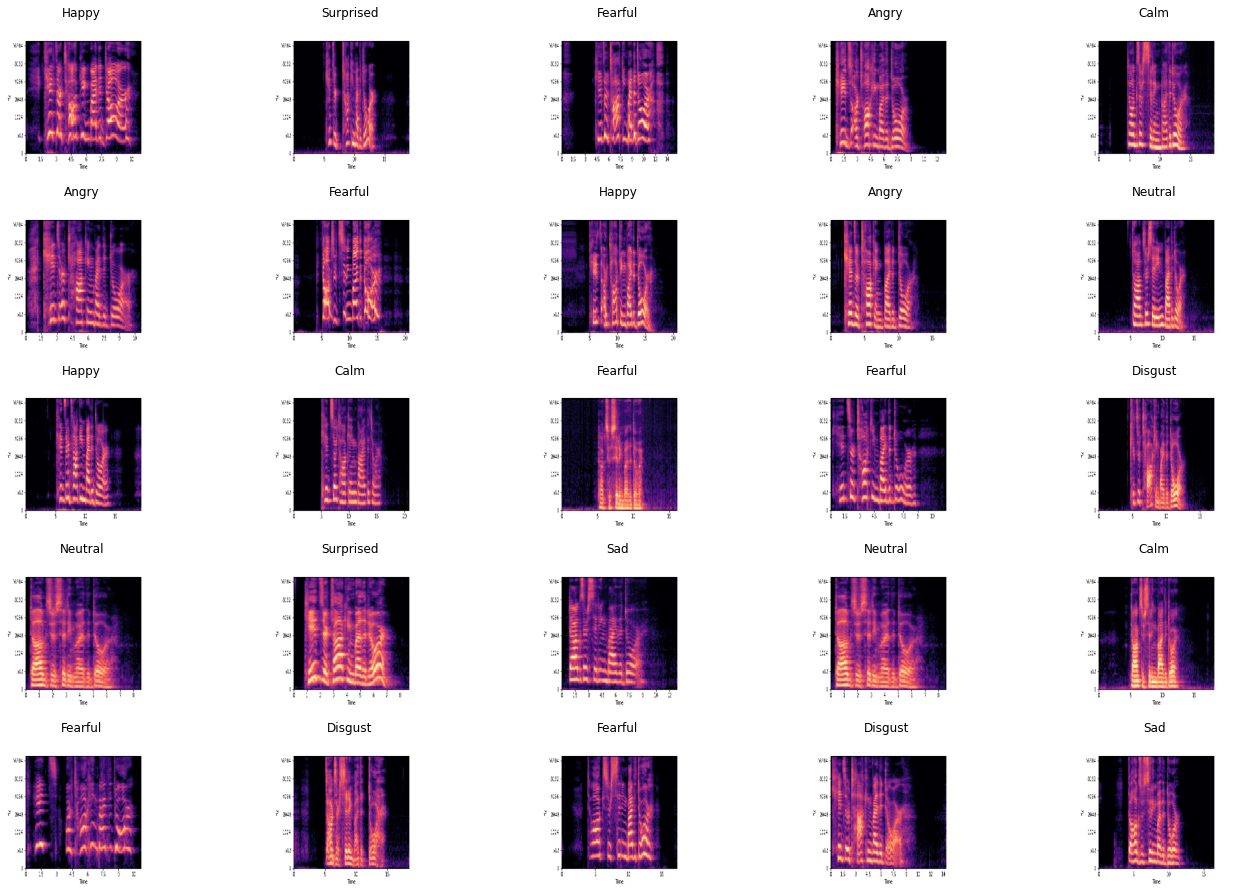

In [ ]:
from random import randint
def get_classlabel(class_code):
    labels = {'Angry':'Angry', 'Calm':'Calm', 'Disgust':'Disgust', 'Fearful':'Fearful', 'Happy':'Happy', 'Neutral':'Neutral','Sad':'Sad','Surprised':'Surprised'}
    
    return labels[class_code]

f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(data))
        ax[i,j].imshow(data[rnd_number])
        ax[i,j].set_title(get_classlabel(labels[rnd_number]))
        ax[i,j].axis('off')

In [17]:

# Check shapes of training and testing sets
print('X_train has a shape of {}, y_train has a shape of {}'.format(X_train.shape,y_train.shape))
print('X_test has a shape of {}, y_test has a shape of {}'.format(X_test.shape,y_test.shape))

X_train has a shape of (1152, 224, 224, 3), y_train has a shape of (1152,)
X_test has a shape of (288, 224, 224, 3), y_test has a shape of (288,)


In [18]:
# Finally, we normalize pixels in X_train and X_test to the range [0,1] for faster convergence
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [19]:
from keras.utils import np_utils, to_categorical

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

# VGG16

In [ ]:
from keras.applications import VGG16

vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [ ]:
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
x = vgg_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x) # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
x = Dense(8, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=vgg_model.input, outputs=x)

In [ ]:
# Make sure you have frozen the correct layers
for i, layer in enumerate(vgg_model.layers):
    print(i, layer.name, layer.trainable)

0 input_15 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False


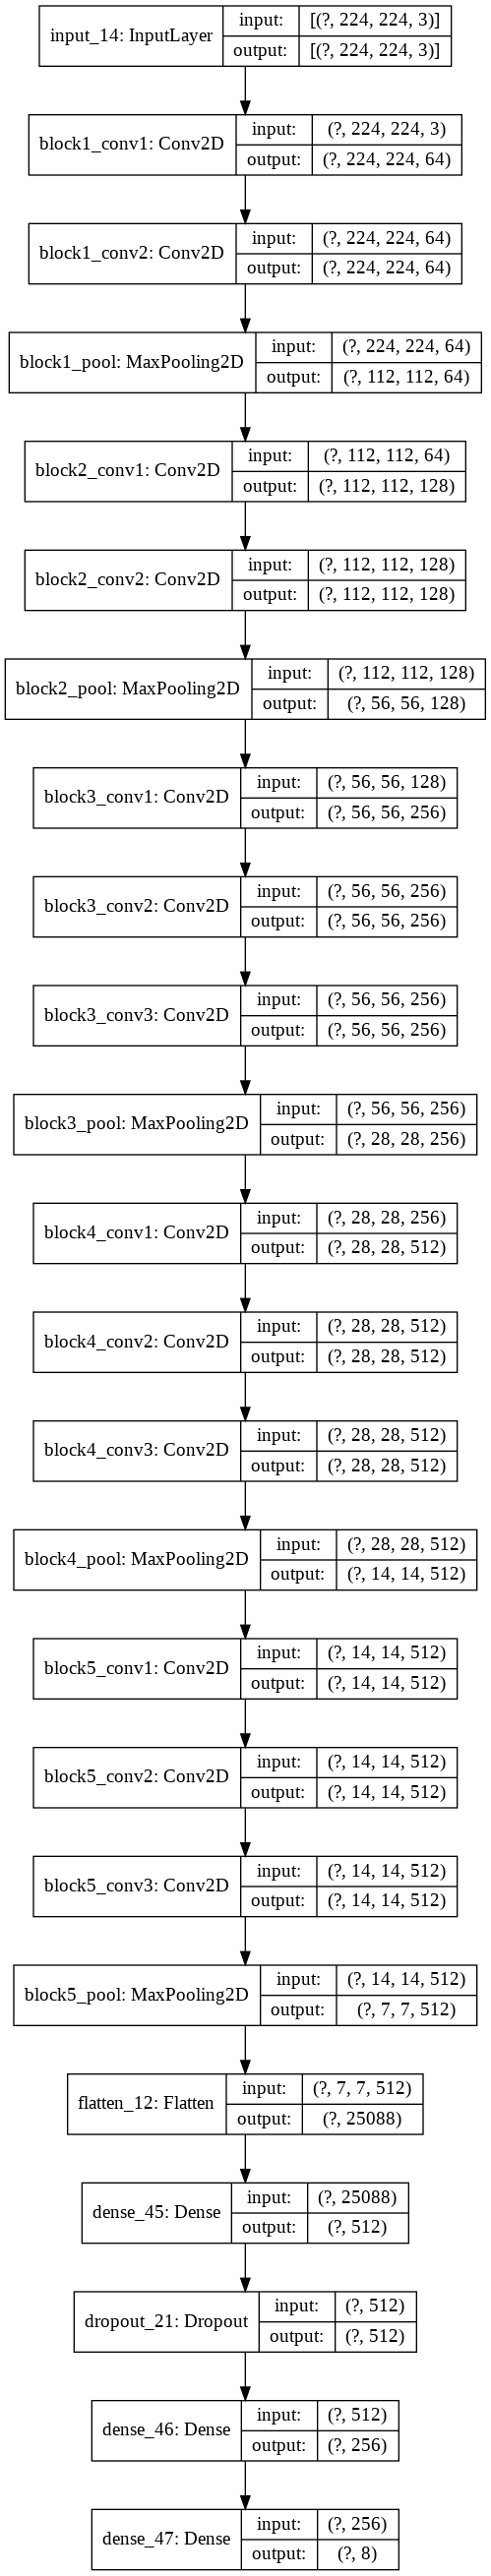

In [ ]:
keras.utils.plot_model(transfer_model, show_shapes=True)

In [ ]:

from tensorflow.keras import layers, models, Model, optimizers

learning_rate= 5e-5
transfer_model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics=["accuracy"])

In [ ]:

# Here we use testing set as validation set
history = transfer_model.fit(X_train, y_train, batch_size = 1, epochs=50, validation_data=(X_test,y_test))

Epoch 1/50
1152/1152 [==============================] - 20s 17ms/step - loss: 2.1411 - accuracy: 0.1736 - val_loss: 1.9085 - val_accuracy: 0.2674
Epoch 2/50
1152/1152 [==============================] - 20s 17ms/step - loss: 1.9526 - accuracy: 0.2309 - val_loss: 1.8582 - val_accuracy: 0.3438
Epoch 3/50
1152/1152 [==============================] - 20s 17ms/step - loss: 1.8006 - accuracy: 0.3194 - val_loss: 1.6504 - val_accuracy: 0.4097
Epoch 4/50
1152/1152 [==============================] - 20s 17ms/step - loss: 1.6897 - accuracy: 0.3481 - val_loss: 1.5975 - val_accuracy: 0.4201
Epoch 5/50
1152/1152 [==============================] - 20s 17ms/step - loss: 1.6386 - accuracy: 0.3819 - val_loss: 1.5117 - val_accuracy: 0.4479
Epoch 6/50
1152/1152 [==============================] - 20s 17ms/step - loss: 1.5634 - accuracy: 0.3976 - val_loss: 1.4729 - val_accuracy: 0.4549
Epoch 7/50
1152/1152 [==============================] - 20s 17ms/step - loss: 1.4716 - accuracy: 0.4210 - val_loss: 1.3813 -

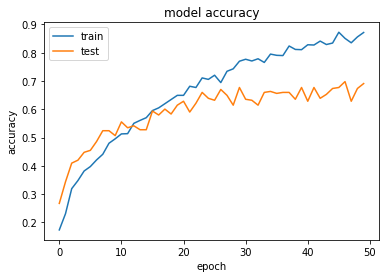

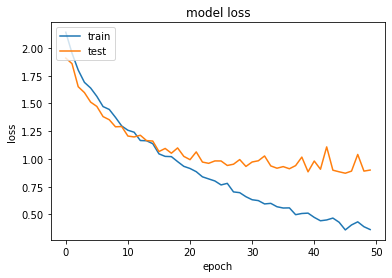

In [ ]:
        # PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

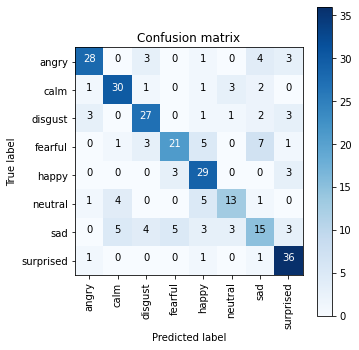

In [ ]:
y_pred = transfer_model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.82      0.72      0.77        39
        calm       0.75      0.79      0.77        38
     disgust       0.71      0.73      0.72        37
     fearful       0.72      0.55      0.63        38
       happy       0.63      0.83      0.72        35
     neutral       0.65      0.54      0.59        24
         sad       0.47      0.39      0.43        38
   surprised       0.73      0.92      0.82        39

    accuracy                           0.69       288
   macro avg       0.69      0.68      0.68       288
weighted avg       0.69      0.69      0.68       288



# VGG16 Fine-Tuning

In [79]:
from keras.applications import VGG16

vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [80]:
for layer in vgg_model.layers[:15]:
    layer.trainable = False

In [81]:
# Make sure you have frozen the correct layers
for i, layer in enumerate(vgg_model.layers):
    print(i, layer.name, layer.trainable)

0 input_7 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


In [82]:
x = vgg_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x) # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
x = Dense(8, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=vgg_model.input, outputs=x)

In [83]:
from keras.callbacks import ReduceLROnPlateau

# reduce learning rate when val_accuracy has stopped improving
# lr_reduce = ReduceLROnPlateau(monitor='val_accuracy',
#                                           factor=0.6,
#                                           patience=8,
#                                           verbose=1,
#                                           mode='max',
#                                           min_lr=5e-5)


lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', 
                              patience = 2, 
                              verbose=1,
                              factor=0.3, 
                              min_lr=0.000001)

checkpoint = ModelCheckpoint('finetune.h15', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)


In [84]:

from tensorflow.keras import layers, models, Model, optimizers

learning_rate= 5e-5
transfer_model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics=["accuracy"])

In [85]:
# Here we use testing set as validation set
history = transfer_model.fit(X_train, y_train, batch_size = 1, epochs=50, validation_data=(X_test,y_test), callbacks=[lr_reduce,checkpoint])

Epoch 1/50
1152/1152 [==============================] - ETA: 0s - loss: 1.9756 - accuracy: 0.2161WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0017s vs `on_test_batch_end` time: 0.0055s). Check your callbacks.

Epoch 00001: val_accuracy improved from -inf to 0.36111, saving model to finetune.h15
INFO:tensorflow:Assets written to: finetune.h15/assets
1152/1152 [==============================] - 26s 22ms/step - loss: 1.9756 - accuracy: 0.2161 - val_loss: 1.7015 - val_accuracy: 0.3611
Epoch 2/50
1150/1152 [============================>.] - ETA: 0s - loss: 1.6048 - accuracy: 0.3791
Epoch 00002: val_accuracy improved from 0.36111 to 0.47569, saving model to finetune.h15
INFO:tensorflow:Assets written to: finetune.h15/assets
1152/1152 [==============================] - 26s 23ms/step - loss: 1.6022 - accuracy: 0.3802 - val_loss: 1.3622 - val_accuracy: 0.4757
Epoch 3/50
1150/1152 [============================>.] - ETA: 0s - loss: 1.36

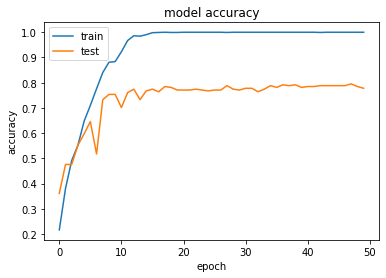

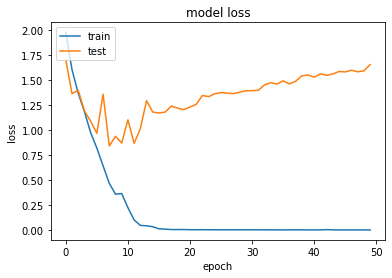

In [86]:
        # PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

In [87]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

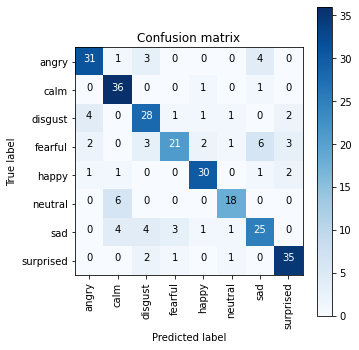

In [88]:
y_pred = transfer_model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [89]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.82      0.79      0.81        39
        calm       0.75      0.95      0.84        38
     disgust       0.70      0.76      0.73        37
     fearful       0.81      0.55      0.66        38
       happy       0.86      0.86      0.86        35
     neutral       0.82      0.75      0.78        24
         sad       0.68      0.66      0.67        38
   surprised       0.83      0.90      0.86        39

    accuracy                           0.78       288
   macro avg       0.78      0.78      0.77       288
weighted avg       0.78      0.78      0.77       288



# VGG16 Image Augmentation

In [ ]:
from keras.callbacks import ReduceLROnPlateau

# reduce learning rate when val_accuracy has stopped improving
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy',
                                          factor=0.6,
                                          patience=8,
                                          verbose=1,
                                          mode='max',
                                          min_lr=5e-5)

# stop training when val_accuracy has stopped improving
early_stop = EarlyStopping(monitor='val_accuracy',
                                       patience=8,
                                       verbose=1,
                                       mode='max')

checkpoint = ModelCheckpoint('face_detector.h15', monitor= 'val_loss', mode= 'min', save_best_only = True, verbose= 1)


In [ ]:
from keras.applications import VGG16

vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
x = vgg_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x) # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
x = Dense(8, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=vgg_model.input, outputs=x)

In [ ]:
for i, layer in enumerate(transfer_model.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False
19 flatten True
20 dense True
21 dropout True
22 dense_1 True
23 dense_2 True


In [ ]:
img_id=3
img_generator = train_datagen.flow(train_data[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
angry_img = [next(img_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(15, 6))
print('Labels:', [item[1][0] for item in angry_img])
l = [ax[i].imshow(angry_img[i][0][0]) for i in range(0,5)]

NameError: ignored

In [ ]:
train_datagen = ImageDataGenerator( 
                                   width_shift_range=0.3,
                                   height_shift_range=0.3, 
                                   horizontal_flip = True,
                                   vertical_flip=True,
                                   shear_range=0.3,
                                   fill_mode="nearest")

train_generator = train_datagen.flow(X_train,
                                     y_train,
                                     batch_size=1)

# val_datagen = ImageDataGenerator(rescale=1./255)
                        
# val_generator = val_datagen.flow(X_test,
#                                  y_test,
#                                  batch_size=1)

# train_datagen = ImageDataGenerator(rescale=1./255,
#                                    zoom_range=0.3, 
#                                    rotation_range=40,
#                                    width_shift_range=0.3, 
#                                    height_shift_range=0.3, 
#                                    shear_range=0.3, 
#                                    horizontal_flip=True, 
#                                    fill_mode="nearest")

# train_generator = train_datagen.flow(X_train,
#                                      y_train,
#                                      batch_size=1)

# val_datagen = ImageDataGenerator(rescale=1./255)
                        
# val_generator = val_datagen.flow(X_test,
#                                  y_test,
#                                  batch_size=16)

# train_steps_per_epoch = X_train.shape[0] // 16
# val_steps_per_epoch = X_test.shape[0] // 16

# train_datagen.fit(X_train)
# val_datagen.fit(X_test)

learning_rate= 5e-5
transfer_model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(lr=learning_rate), metrics=["accuracy"])

history = transfer_model.fit_generator(train_generator,
                    # steps_per_epoch=300,
                    validation_data=(X_test,y_test),
                    # validation_steps=50,
                    epochs=100,
                    shuffle=True,
                    # callbacks=[lr_reduce,checkpoint],
                    verbose=1)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
1152/1152 [==============================] - 21s 19ms/step - loss: 2.2615 - accuracy: 0.1311 - val_loss: 2.0743 - val_accuracy: 0.1285
Epoch 2/100
1152/1152 [==============================] - 20s 17ms/step - loss: 2.1113 - accuracy: 0.1589 - val_loss: 2.0255 - val_accuracy: 0.2361
Epoch 3/100
1152/1152 [==============================] - 20s 17ms/step - loss: 2.0616 - accuracy: 0.1710 - val_loss: 2.0181 - val_accuracy: 0.2361
Epoch 4/100
1152/1152 [==============================] - 20s 17ms/step - loss: 2.0332 - accuracy: 0.1814 - val_loss: 1.9909 - val_accuracy: 0.2292
Epoch 5/100
1152/1152 [==============================] - 20s 17ms/step - loss: 2.0145 - accuracy: 0.1875 - val_loss: 1.9481 - val_accuracy: 0.2431
Epoch 6/100
1152/1152 [==============================] - 19s 17ms/step - loss: 1.9766 - accuracy: 0.1849 - val_loss: 1.9235 - val_accuracy: 0.2743
Epoch 7/100
1152/1152 [===================

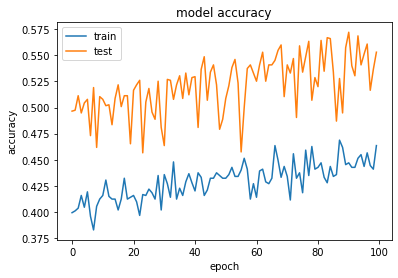

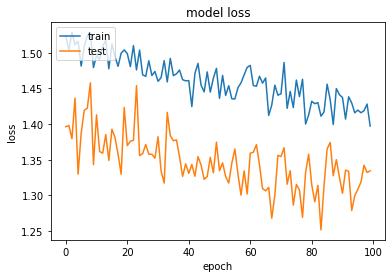

In [ ]:
        # PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

In [ ]:
y_pred = transfer_model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

# VGG16 Fine Tuning With Image Augmentation

In [90]:
from keras.applications import VGG16

vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [91]:
for layer in vgg_model.layers[:15]:
    layer.trainable = False

In [92]:
x = vgg_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x) # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
x = Dense(8, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=vgg_model.input, outputs=x)

In [93]:
for i, layer in enumerate(transfer_model.layers):
    print(i, layer.name, layer.trainable)

0 input_8 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
19 flatten_8 True
20 dense_24 True
21 dropout_8 True
22 dense_25 True
23 dense_26 True


In [94]:
from keras.callbacks import ReduceLROnPlateau

# reduce learning rate when val_accuracy has stopped improving
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy',
                                          factor=0.6,
                                          patience=8,
                                          verbose=1,
                                          mode='max',
                                          min_lr=5e-5)

checkpoint = ModelCheckpoint('vgg16_finetune_augment.h15', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)


In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.2, 
                                   rotation_range=40,
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest')

train_generator = train_datagen.flow(X_train,
                                     y_train,
                                     batch_size=1)



# train_datagen = ImageDataGenerator(rescale=1./255,
#                                    zoom_range=0.3, 
#                                    rotation_range=40,
#                                    width_shift_range=0.3, 
#                                    height_shift_range=0.3, 
#                                    shear_range=0.3, 
#                                    horizontal_flip=True, 
#                                    fill_mode="nearest")

# train_generator = train_datagen.flow(X_train,
#                                      y_train,
#                                      batch_size=1)

# val_datagen = ImageDataGenerator(rescale=1./255)
                        
# val_generator = val_datagen.flow(X_test,
#                                  y_test,
#                                  batch_size=16)

# train_steps_per_epoch = X_train.shape[0] // 16
# val_steps_per_epoch = X_test.shape[0] // 16

# train_datagen.fit(X_train)
# val_datagen.fit(X_test)

learning_rate= 5e-5
transfer_model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(lr=learning_rate), metrics=["accuracy"])

history = transfer_model.fit_generator(train_generator,
                    # steps_per_epoch=300,
                    validation_data=(X_test,y_test),
                    # validation_steps=50,
                    epochs=100,
                    shuffle=True,
                    callbacks=[lr_reduce,checkpoint],
                    verbose=1)


Epoch 1/100
1151/1152 [============================>.] - ETA: 0s - loss: 2.1122 - accuracy: 0.1381WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0103s vs `on_test_batch_end` time: 0.1226s). Check your callbacks.

Epoch 00001: val_accuracy improved from -inf to 0.18056, saving model to vgg16_finetune_augment.h15
INFO:tensorflow:Assets written to: vgg16_finetune_augment.h15/assets
1152/1152 [==============================] - 27s 23ms/step - loss: 2.1125 - accuracy: 0.1380 - val_loss: 2.0065 - val_accuracy: 0.1806
Epoch 2/100
1107/1152 [===========================>..] - ETA: 0s - loss: 1.9658 - accuracy: 0.2060

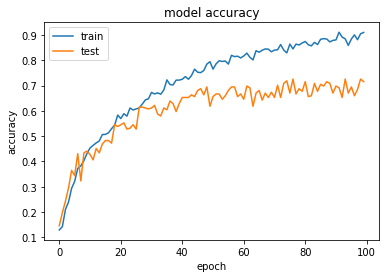

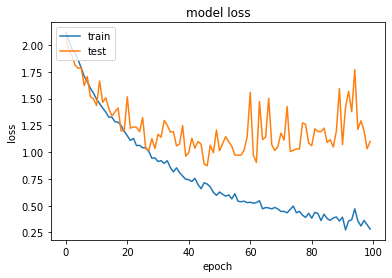

In [56]:
        # PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

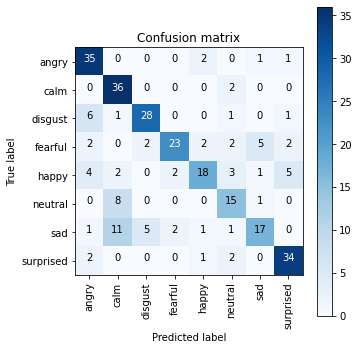

In [57]:
y_pred = transfer_model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [58]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.70      0.90      0.79        39
        calm       0.62      0.95      0.75        38
     disgust       0.80      0.76      0.78        37
     fearful       0.85      0.61      0.71        38
       happy       0.75      0.51      0.61        35
     neutral       0.58      0.62      0.60        24
         sad       0.68      0.45      0.54        38
   surprised       0.79      0.87      0.83        39

    accuracy                           0.72       288
   macro avg       0.72      0.71      0.70       288
weighted avg       0.73      0.72      0.71       288



# Inception

In [ ]:
from keras.applications import InceptionV3
pretrained_model=InceptionV3(input_shape=(224,224,3),
                             include_top=False,
                             weights='imagenet')

In [ ]:
for layer in pretrained_model.layers[:12]:
  layer.trainable=False

In [ ]:
for layer in pretrained_model.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7ff565077160> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff565077358> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7ff564f95438> False
<tensorflow.python.keras.layers.core.Activation object at 0x7ff565077ba8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff5650779b0> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7ff564802f28> False
<tensorflow.python.keras.layers.core.Activation object at 0x7ff5648072b0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff5648072e8> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7ff577fca7f0> False
<tensorflow.python.keras.layers.core.Activation object at 0x7ff577fcaba8> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7ff577fcabe0> False
<tensorflow.python.keras.layers.c

In [ ]:
learning_rate=5e-5

x=layers.Flatten()(pretrained_model.output)
x=layers.Dense(1024,activation='relu')(x)
x=layers.Dropout(0.2)(x)
x=layers.Dense(256,activation='relu')(x)
x=layers.Dropout(0.2)(x)
x=layers.Dense(8,activation='sigmoid')(x)
model=Model(pretrained_model.input,x)
model.compile(tf.keras.optimizers.Adam(lr=learning_rate),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
from keras.callbacks import ReduceLROnPlateau

# reduce learning rate when val_accuracy has stopped improving
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy',
                                          factor=0.6,
                                          patience=8,
                                          verbose=1,
                                          mode='max',
                                          min_lr=5e-5)

# stop training when val_accuracy has stopped improving
early_stop = EarlyStopping(monitor='val_accuracy',
                                       patience=8,
                                       verbose=1,
                                       mode='max')

checkpoint = ModelCheckpoint('face_detector.h15', monitor= 'val_loss', mode= 'min', save_best_only = True, verbose= 1)

In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),
                            epochs=20,
                            batch_size=16,
                            callbacks=[lr_reduce, early_stop])

Epoch 1/20
72/72 [==============================] - 11s 149ms/step - loss: 2.0282 - accuracy: 0.1632 - val_loss: 2.3026 - val_accuracy: 0.1736
Epoch 2/20
72/72 [==============================] - 9s 131ms/step - loss: 1.8505 - accuracy: 0.2318 - val_loss: 1.7880 - val_accuracy: 0.2951
Epoch 3/20
72/72 [==============================] - 10s 132ms/step - loss: 1.7901 - accuracy: 0.2960 - val_loss: 1.6799 - val_accuracy: 0.3229
Epoch 4/20
72/72 [==============================] - 10s 133ms/step - loss: 1.6333 - accuracy: 0.3472 - val_loss: 1.7116 - val_accuracy: 0.3542
Epoch 5/20
72/72 [==============================] - 10s 135ms/step - loss: 1.4326 - accuracy: 0.4757 - val_loss: 1.4515 - val_accuracy: 0.4201
Epoch 6/20
72/72 [==============================] - 10s 136ms/step - loss: 1.1832 - accuracy: 0.5773 - val_loss: 1.4012 - val_accuracy: 0.5312
Epoch 7/20
72/72 [==============================] - 10s 137ms/step - loss: 1.0086 - accuracy: 0.6415 - val_loss: 1.3871 - val_accuracy: 0.5417


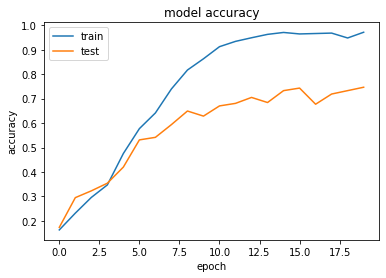

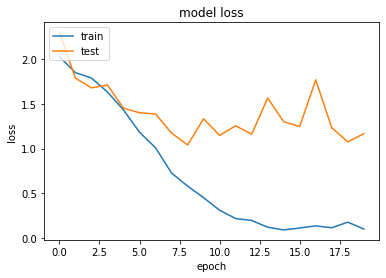

In [ ]:
# PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

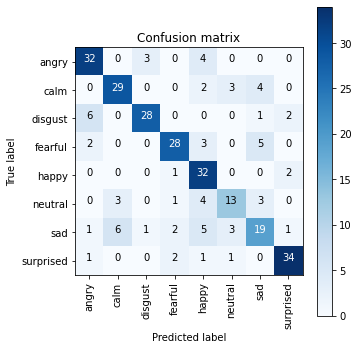

In [ ]:
y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [ ]:
# 75 VAL_ACC WITH 20 EPOCHS 16 BATCH SIZE

from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.76      0.82      0.79        39
        calm       0.76      0.76      0.76        38
     disgust       0.88      0.76      0.81        37
     fearful       0.82      0.74      0.78        38
       happy       0.63      0.91      0.74        35
     neutral       0.65      0.54      0.59        24
         sad       0.59      0.50      0.54        38
   surprised       0.87      0.87      0.87        39

    accuracy                           0.75       288
   macro avg       0.75      0.74      0.74       288
weighted avg       0.75      0.75      0.74       288



# Inception Data Augmentation

In [ ]:

train_datagen = ImageDataGenerator(
                                   zoom_range=0.3
                                   rotation_range=30
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2 
                                   horizontal_flip=True,
                                   fill_mode="nearest")

train_generator = train_datagen.flow(X_train,
                                     y_train,
                                     batch_size=32)

# val_datagen = ImageDataGenerator(rescale=1./255)
                        
# val_generator = val_datagen.flow(X_test,
#                                  y_test,
#                                  batch_size=16)

# train_steps_per_epoch = X_train.shape[0] // 16
# val_steps_per_epoch = X_test.shape[0] // 16

learning_rate= 5e-5
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(lr=learning_rate), metrics=["accuracy"])

history = model.fit_generator(train_generator,
                    # steps_per_epoch=train_steps_per_epoch,
                    validation_data=(X_test,y_test),
                    # validation_steps=val_steps_per_epoch,
                    epochs=50,
                    shuffle=True,
                    callbacks=[lr_reduce,checkpoint],
                    verbose=1)


Epoch 1/50
36/36 [==============================] - ETA: 0s - loss: 5.7983e-04 - accuracy: 1.0000WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0167s vs `on_test_batch_end` time: 0.0551s). Check your callbacks.

Epoch 00001: val_loss did not improve from 0.69531
36/36 [==============================] - 15s 409ms/step - loss: 5.7983e-04 - accuracy: 1.0000 - val_loss: 1.7382 - val_accuracy: 0.7708
Epoch 2/50
36/36 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 0.9991
Epoch 00002: val_loss did not improve from 0.69531
36/36 [==============================] - 14s 386ms/step - loss: 0.0022 - accuracy: 0.9991 - val_loss: 1.9380 - val_accuracy: 0.7569
Epoch 3/50
36/36 [==============================] - ETA: 0s - loss: 0.0127 - accuracy: 0.9983
Epoch 00003: val_loss did not improve from 0.69531
36/36 [==============================] - 14s 387ms/step - loss: 0.0127 - accuracy: 0.9983 - val_loss: 1.7601 - val_accur

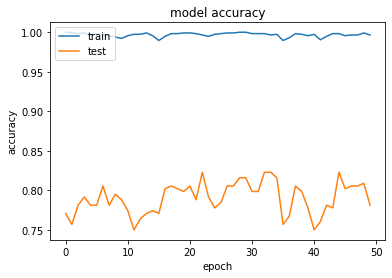

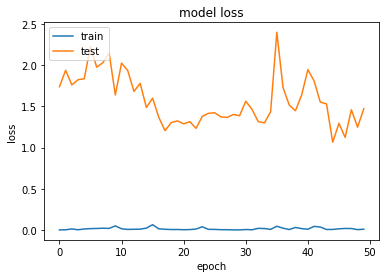

In [ ]:
# PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

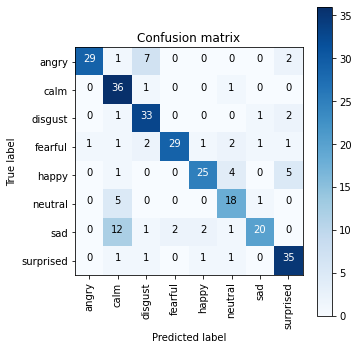

In [ ]:
y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [ ]:
# 75 VAL_ACC WITH 20 EPOCHS 16 BATCH SIZE

from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.97      0.74      0.84        39
        calm       0.62      0.95      0.75        38
     disgust       0.73      0.89      0.80        37
     fearful       0.94      0.76      0.84        38
       happy       0.86      0.71      0.78        35
     neutral       0.67      0.75      0.71        24
         sad       0.87      0.53      0.66        38
   surprised       0.78      0.90      0.83        39

    accuracy                           0.78       288
   macro avg       0.80      0.78      0.78       288
weighted avg       0.81      0.78      0.78       288



#VGG19

In [ ]:
from tensorflow.keras.applications import vgg19
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.vgg19 import decode_predictions
from tensorflow.keras.applications.vgg19 import VGG19
img_height, img_width = 224,224
conv_base = vgg19.VGG19(weights='imagenet', pooling='avg', include_top=False, input_shape = (img_width, img_height, 3))

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in conv_base.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7ff3261d67b8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff3261d6630> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff3244804e0> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7ff322172908> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff3261d6ba8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff3261d6978> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7ff321dd0ba8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff321dd0c88> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff321d83be0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff321d21dd8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff321d2a4e0> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7ff321d2e

In [ ]:
for layer in conv_base.layers:
    layer.trainable = False

In [ ]:
from tensorflow.python.keras import layers, models, Model, optimizers
from tensorflow.keras import regularizers
# model = models.Sequential()
# model.add(conv_base)
# model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# model.add(Dropout(0.2))
# model.add(Dense(8, activation='softmax',kernel_regularizer=regularizers.l2(0.001)))
# model.summary()

model = models.Sequential()
model.add(conv_base)
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(8, activation='softmax',kernel_regularizer=regularizers.l2(0.001)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 4104      
Total params: 21,078,600
Trainable params: 1,054,216
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
from tensorflow.python.keras.applications import vgg16
from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers, models, Model, optimizers

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

batch_size=1
learning_rate = 5e-5
epochs = 40
checkpoint = ModelCheckpoint("sign_classifier.h5", monitor = 'val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics = ['acc'])

In [ ]:
history = model.fit(X_train, y_train,batch_size=batch_size,
                              epochs=epochs,
                              shuffle=True, 
                              validation_data=(X_test,y_test),
                              callbacks=[checkpoint]
                              )

Epoch 1/40
1150/1152 [============================>.] - ETA: 0s - loss: 2.8968 - acc: 0.1617WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0023s vs `on_test_batch_end` time: 0.0070s). Check your callbacks.

Epoch 00001: val_acc improved from -inf to 0.13194, saving model to sign_classifier.h5
1152/1152 [==============================] - 17s 15ms/step - loss: 2.8963 - acc: 0.1615 - val_loss: 2.6342 - val_acc: 0.1319
Epoch 2/40
1149/1152 [============================>.] - ETA: 0s - loss: 2.5330 - acc: 0.1967
Epoch 00002: val_acc improved from 0.13194 to 0.18403, saving model to sign_classifier.h5
1152/1152 [==============================] - 17s 15ms/step - loss: 2.5328 - acc: 0.1970 - val_loss: 2.4604 - val_acc: 0.1840
Epoch 3/40
1151/1152 [============================>.] - ETA: 0s - loss: 2.4031 - acc: 0.2606
Epoch 00003: val_acc improved from 0.18403 to 0.30208, saving model to sign_classifier.h5
1152/1152 [====================

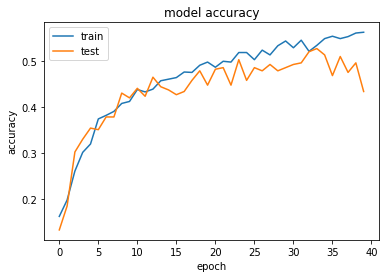

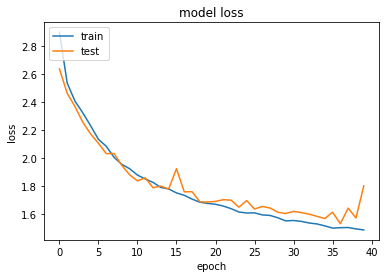

In [ ]:
# PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

# VGG19 Data Augmentation

In [ ]:
#Image Data Augmentation
train_generator = ImageDataGenerator(rotation_range=4, horizontal_flip=True, zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(X_train)

# train_generator = train_datagen.flow(X_train,
#                                      y_train,
#                                      batch_size=32)

from keras.callbacks import ReduceLROnPlateau

lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01, patience=3, min_lr=1e-5)


In [ ]:
for layer in conv_base.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7ff3261d67b8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff3261d6630> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff3244804e0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7ff322172908> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff3261d6ba8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff3261d6978> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7ff321dd0ba8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff321dd0c88> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff321d83be0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff321d21dd8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff321d2a4e0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 

In [ ]:
for layer in conv_base.layers[:-12]:
    layer.trainable = False

In [ ]:
input_shape=(224,224,3)

model = models.Sequential()
model.add(conv_base)
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(8, activation='softmax',kernel_regularizer=regularizers.l2(0.001)))
model.summary()

from tensorflow.keras import layers, models, Model, optimizers

#Initializing the hyperparameters
learning_rate = 5e-5
epochs = 40
batch_size=16
# checkpoint = ModelCheckpoint("sign_classifier_augm.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics = ['acc'])
history = model.fit_generator(train_generator.flow(X_train, y_train, batch_size=batch_size),
                              epochs = epochs, 
                              steps_per_epoch = X_train.shape[0]//batch_size, 
                              validation_data = (X_test,y_test), 
                              callbacks=[lrr], 
                              verbose = 1,
                              shuffle=True
                              )



Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
dense_23 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dropout_13 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_25 (Dense)             (None, 8)                 4104      
Total params: 21,078,600
Trainable params: 1,054,216
Non-trainable params: 20,024,384
_________________________________________________________________
Epoch 1/40
72/72 [==============================] - 14s 200ms/step - loss: 3.3863 - acc: 0.1519 - va

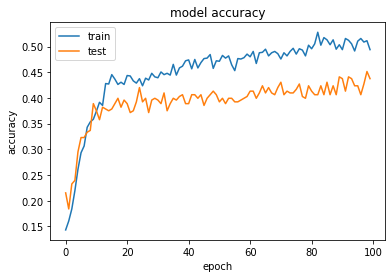

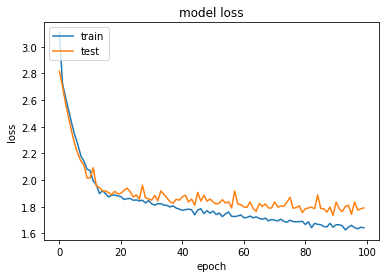

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

# Xception

In [ ]:
from keras.applications import Xception


In [ ]:
#load pre trained Xception model
base_model = Xception(weights='imagenet',pooling='avg', include_top=False, input_shape=(224,224,3))
#Summary of Xception Model
# base_model.summary()

83689472/83683744 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras.applications.xception import Xception

input_shape = (224,224,3)
pretrained_model = Xception(input_shape = input_shape,
                weights = 'imagenet',
                include_top = False)
pretrained_model.trainable = False

for layer in pretrained_model.layers:
    layer.trainable = False

# n=20
# for layer in base_model.layers[:n]:
#    layer.trainable = False
# for layer in base_model.layers[n:]:
#    layer.trainable = True

model = Sequential()

model.add(pretrained_model)

model.add(Flatten())

model.add(Dense(2048))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.15))

# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.15))

model.add(Dense(8))
model.add(Activation('softmax'))

model.summary() 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten_3 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 2048)              205522944 
_________________________________________________________________
activation_10 (Activation)   (None, 2048)              0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
activation_11 (Activation)   (None, 1024)             

In [ ]:
from keras.callbacks import ReduceLROnPlateau
# Setup a callback to save the best model
callbacks = [ 
    ModelCheckpoint('./output/model.features.{epoch:02d}-{val_acc:.2f}.hdf5', 
      monitor='val_acc', verbose=1, save_best_only=True, 
      mode='max', period=1),
             
    ReduceLROnPlateau(monitor='val_loss', verbose=1, 
     factor=0.5, patience=5, min_lr=0.00005)
            ]


In [ ]:
from tensorflow.python.keras.applications import vgg16
from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras import layers, models, Model, optimizers
from keras.optimizers import SGD

learning_rate = 5e-5
epochs = 40
batch_size=1

lr=5e-5
opt = SGD(lr=5e-5, momentum=0.9, decay=lr/epochs)
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(lr=lr,decay=1e-6), metrics = ['acc'])

In [ ]:
history = model.fit(X_train,y_train, 
                              epochs=epochs, 
                              shuffle=True, 
                              batch_size=batch_size,
                              # steps_per_epoch = X_train.shape[0]//batch_size, 
                              validation_data=(X_test,y_test),
                              callbacks=callbacks
                              )

Epoch 1/40
1152/1152 [==============================] - ETA: 0s - loss: 2.8722 - acc: 0.2483WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0044s vs `on_test_batch_end` time: 0.0066s). Check your callbacks.

Epoch 00001: val_acc improved from -inf to 0.25694, saving model to ./output/model.features.01-0.26.hdf5
1152/1152 [==============================] - 60s 52ms/step - loss: 2.8722 - acc: 0.2483 - val_loss: 1.9509 - val_acc: 0.2569
Epoch 2/40
1152/1152 [==============================] - ETA: 0s - loss: 1.9082 - acc: 0.2856
Epoch 00002: val_acc improved from 0.25694 to 0.35764, saving model to ./output/model.features.02-0.36.hdf5
1152/1152 [==============================] - 59s 51ms/step - loss: 1.9082 - acc: 0.2856 - val_loss: 1.6738 - val_acc: 0.3576
Epoch 3/40
1152/1152 [==============================] - ETA: 0s - loss: 1.7741 - acc: 0.3602
Epoch 00003: val_acc improved from 0.35764 to 0.39583, saving model to ./output/model

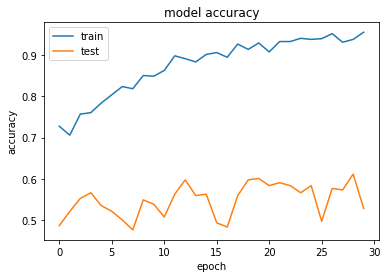

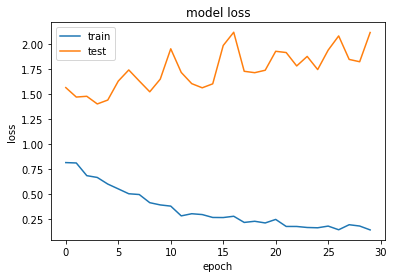

In [ ]:
        # PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

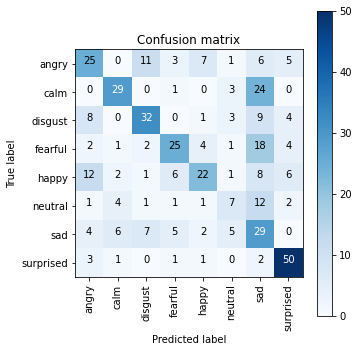

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.45      0.43      0.44        58
        calm       0.67      0.51      0.58        57
     disgust       0.59      0.56      0.58        57
     fearful       0.60      0.44      0.51        57
       happy       0.58      0.38      0.46        58
     neutral       0.33      0.24      0.28        29
         sad       0.27      0.50      0.35        58
   surprised       0.70      0.86      0.78        58

    accuracy                           0.51       432
   macro avg       0.53      0.49      0.50       432
weighted avg       0.54      0.51      0.51       432



# Xception Data Augmentation

In [ ]:
#Image Data Augmentation
train_generator = ImageDataGenerator(zoom_range=0.2, rotation_range=40,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_generator = ImageDataGenerator(zoom_range=0.2, rotation_range=40,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

# test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True, zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(X_train)
val_generator.fit(X_val)
# test_generator.fit(x_test)

# from keras.callbacks import ReduceLROnPlateau

# lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01, patience=3, min_lr=1e-5)


for layer in pretrained_model.layers:
    layer.trainable = False

model = Sequential()

model.add(pretrained_model)

model.add(Flatten())

model.add(Dense(2048))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.15))

model.add(Dense(8))
model.add(Activation('softmax'))


from tensorflow.keras import layers, models, Model, optimizers

#Initializing the hyperparameters
learning_rate = 5e-5
epochs = 30
batch_size=8
# checkpoint = ModelCheckpoint("sign_classifier_augm.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer='Adam', metrics = ['acc'])

In [ ]:
history = model.fit_generator(train_generator.flow(X_train, y_train),
                              epochs = epochs, 
                              # steps_per_epoch = X_train.shape[0]//batch_size, 
                              validation_data = val_generator.flow(X_val, y_val), 
                              callbacks=callbacks, 
                              verbose = 1,
                              shuffle=True
                              )

Epoch 1/10
22/22 [==============================] - ETA: 0s - loss: 2.0619 - acc: 0.1486
Epoch 00001: val_acc did not improve from 0.15512
22/22 [==============================] - 12s 567ms/step - loss: 2.0619 - acc: 0.1486 - val_loss: 2.0885 - val_acc: 0.1386
Epoch 2/10
22/22 [==============================] - ETA: 0s - loss: 2.0599 - acc: 0.1441
Epoch 00002: val_acc did not improve from 0.15512
22/22 [==============================] - 12s 537ms/step - loss: 2.0599 - acc: 0.1441 - val_loss: 2.0872 - val_acc: 0.1551
Epoch 3/10
22/22 [==============================] - ETA: 0s - loss: 2.0604 - acc: 0.1471
Epoch 00003: val_acc did not improve from 0.15512
22/22 [==============================] - 11s 512ms/step - loss: 2.0604 - acc: 0.1471 - val_loss: 2.0828 - val_acc: 0.1353
Epoch 4/10
22/22 [==============================] - ETA: 0s - loss: 2.0634 - acc: 0.1218
Epoch 00004: val_acc did not improve from 0.15512
22/22 [==============================] - 11s 512ms/step - loss: 2.0634 - acc: 

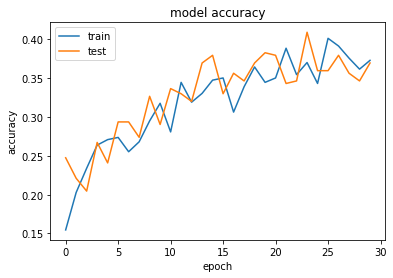

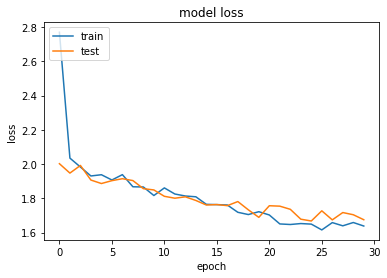

In [ ]:

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()